In [7]:
# 라이브러리 불러오기기
import pandas as pd
import matplotlib.pyplot as plt
import openai
import json
import os
from dotenv import load_dotenv

In [8]:
# 번개 장터 데이터
noshop_df1 = pd.read_csv("hotel_results.csv")

In [9]:
# 중고나라 데이터
noshop_df2 = pd.read_excel("Category-Hotel.xlsx", header=1)

In [10]:
noshop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    0 non-null      float64
 1   platform              500 non-null    object 
 2   original_link         500 non-null    object 
 3   post_time             500 non-null    object 
 4   title                 500 non-null    object 
 5   view_count            500 non-null    object 
 6   like_count            500 non-null    object 
 7   price                 500 non-null    object 
 8   images                500 non-null    object 
 9   description           500 non-null    object 
 10  category              0 non-null      float64
 11  status                0 non-null      float64
 12  seller_location       0 non-null      float64
 13  expiration_date       0 non-null      float64
 14  market_price          0 non-null      float64
 15  capacity              0

In [11]:
noshop_df1.head()

,id,platform,original_link,post_time,title,view_count,like_count,price,images,description,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
0,NaN,번개장터,https://www.번개장터.com/items/,2024-09-30 18:38:54.759015,신라호텔 더파크뷰 식사권(2장),17,0,320000,https://media.bunjang.co.kr/product/291769299_...,10월4일까지는 추가요금 없이 사용가능\n이후로는 7000원 추가결제후 사용가능(호...,...,분당구 구미동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,번개장터,https://www.번개장터.com/items/,2024-09-30 18:36:54.759040,지박소년 하나코군 만화책 원서 11권 특장판 고스트호텔 초대장,90,6,100000,https://media.bunjang.co.kr/product/291409832_...,"지박소년하나코군 11권초판원서,특장판11권원서,고스트호텔소책자,초대장,기타책구매시받...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,번개장터,https://www.번개장터.com/items/,2024-09-30 18:28:54.759050,강릉 씨마크호텔 숙박권 조식 2인과 상품권 20만원포함,6,0,480000,https://media.bunjang.co.kr/product/291836716_...,- 강릉 5성급 씨마크 호텔 주중 숙박권 양도합니다\n\n- 프리미엄 디럭스 오션뷰...,...,강남구 삼성2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,번개장터,https://www.번개장터.com/items/,2024-09-30 17:52:54.759059,서울신라호텔 숙박권 팝니다.,11,0,500000,https://media.bunjang.co.kr/product/291831165_...,평일 주말 다 사용가능 하며 조식은 없습니다.\n객실만 있으면 사용가능하고 전화로 ...,...,영통구 매탄4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,번개장터,https://www.번개장터.com/items/,2024-09-30 17:51:54.759067,(10/1~10/2) 명동 더큐브호텔 숙박 (여성전용),4,0,25000,https://media.bunjang.co.kr/product/291831058_...,명동 더큐브호텔 숙박입니다 \n2024.10.01~2024.10.02 까지예요 여성...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
noshop_df2.head()

,id,platform,original_link,post_time,title,view_count,like_count,price,images,description,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
0,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 10:18:53.001721,"경포 스카이베이호텔 숙박권(10/5,주말)",조회 38,0시세조회,"210,000원",https://img2.joongna.com/media/original/2024/0...,"executive twin 더블,싱글침대 2개\n소인포함 최대4인까지 가능합니다.\...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 10:18:53.002724,야놀자 여기어때 숙박 2만원 할인,조회 9,0시세조회,"1,000원",https://img2.joongna.com/media/original/2024/1...,국내숙박 2만원 할인해서 대신예약 드려요.​\n\n​❗지역 : 비수도권 전지역 가능...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 10:20:53.002724,(10월~11월)비발디파크/단양/변산/거제/천안/청송 외 전지점,조회 2,0시세조회,"5,000원",https://img2.joongna.com/cafe-article-data/liv...,"리조트&호텔 여행사 ""두번째 여행"" 입니다\n\n(대명)소노호텔&리조트/ 켄싱턴 리...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 10:03:53.002724,가평독채노래방풀빌라&키즈펜션,조회 8,0시세조회,"129,000원",https://img2.joongna.com/media/original/2024/1...,안녕 하세요. 남이섬 자라섬5분전\n 길목에 가평에 독채복층 \n풀빌라 쁘띠라온 펜...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 10:02:53.002724,비스타워커힐호텔 10월 2일 한강뷰 고층전망,조회 27,0시세조회,"290,000원",https://img2.joongna.com/media/original/2024/1...,비스타워커힐호텔 \n한강뷰 고층전망 디럭스더블룸 \n\n수영장 피트니스센터 \n4층...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# price, view_count, like_count에서 불필요한 문자 제거하고 숫자형으로 타입 변경
noshop_df2['price'] = noshop_df2['price'].str.replace(',', '').str.replace('원', '').astype(int)
noshop_df2['view_count'] = noshop_df2['view_count'].str.replace('조회 ', '').astype(int)
noshop_df2['like_count'] = noshop_df2['like_count'].str.replace('시세조회', '').astype(int)

In [14]:
# 데이터 병합
noshop_df = pd.concat([noshop_df1,noshop_df2])
noshop_df.reset_index(inplace=True, drop=True)

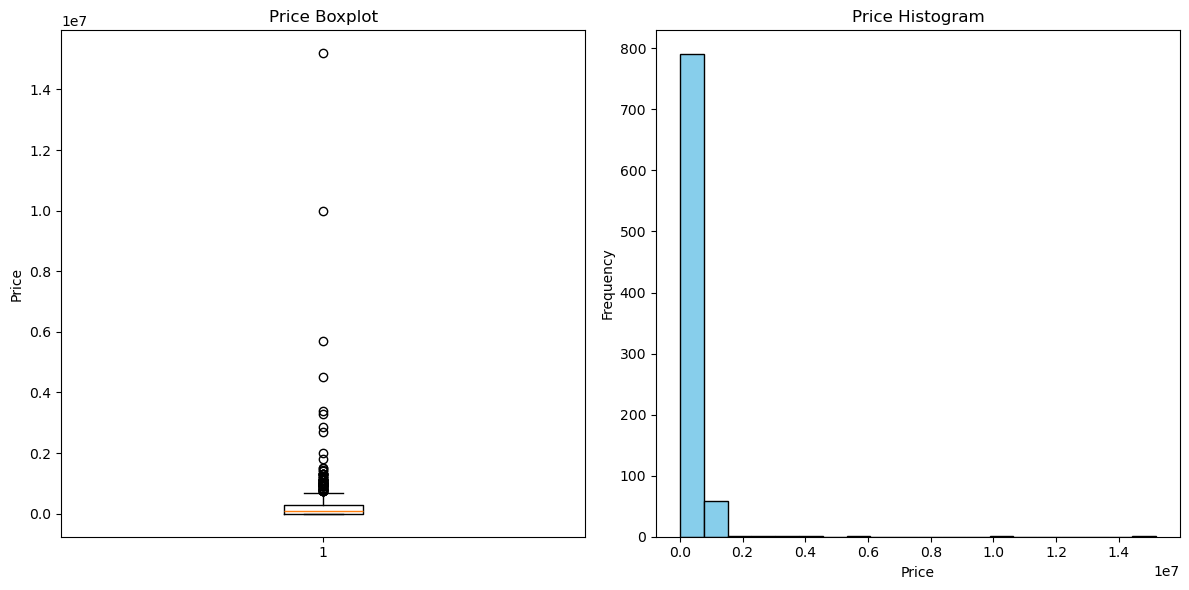

In [15]:
# price에 대한 박스플롯 및 히스토그램
ig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(noshop_df['price'])
axes[0].set_title('Price Boxplot')
axes[0].set_ylabel('Price')

axes[1].hist(noshop_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Price Histogram')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

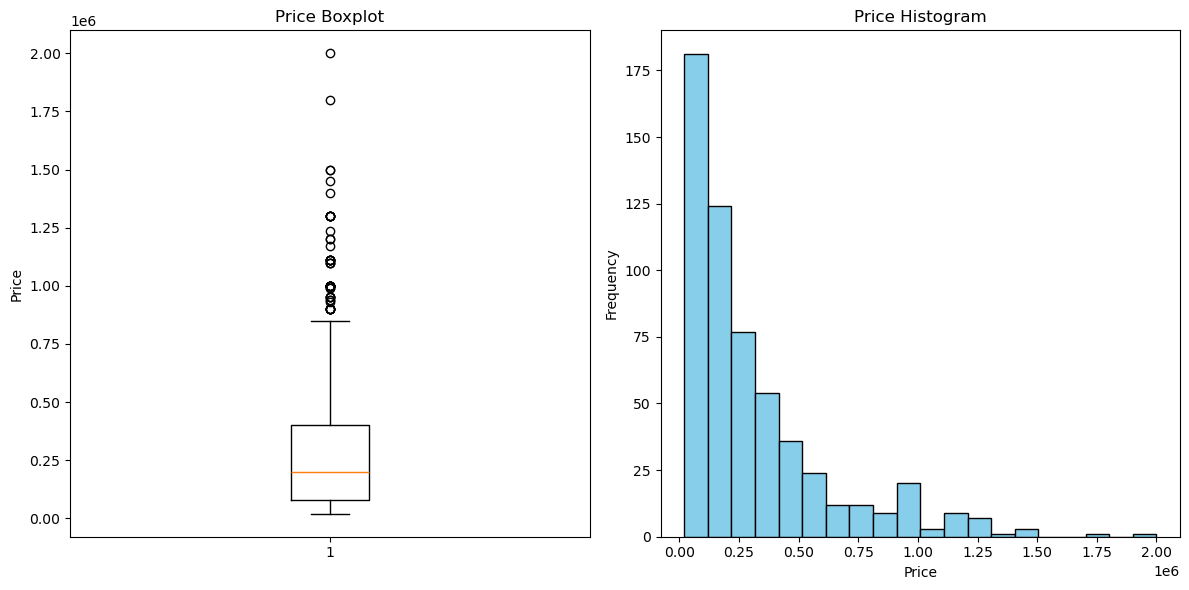

In [16]:
# 필터링된 price에 대한 박스플롯 및 히스토그램(2만원 이상 2백만원 이하)
filter_df = noshop_df[(noshop_df['price']>=20000)&(noshop_df['price']<=2000000)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(filter_df['price'])
axes[0].set_title('Price Boxplot')
axes[0].set_ylabel('Price')

axes[1].hist(filter_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Price Histogram')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# price에 대한 통계치치
noshop_df['price'].describe()

count    8.580000e+02
mean     2.655282e+05
std      7.447612e+05
min      5.000000e+02
25%      6.825000e+03
50%      9.000000e+04
75%      3.000000e+05
max      1.519000e+07
Name: price, dtype: float64

In [18]:
# like_count가 0인 개수
noshop_df[noshop_df['like_count']==0]['like_count'].count()

632

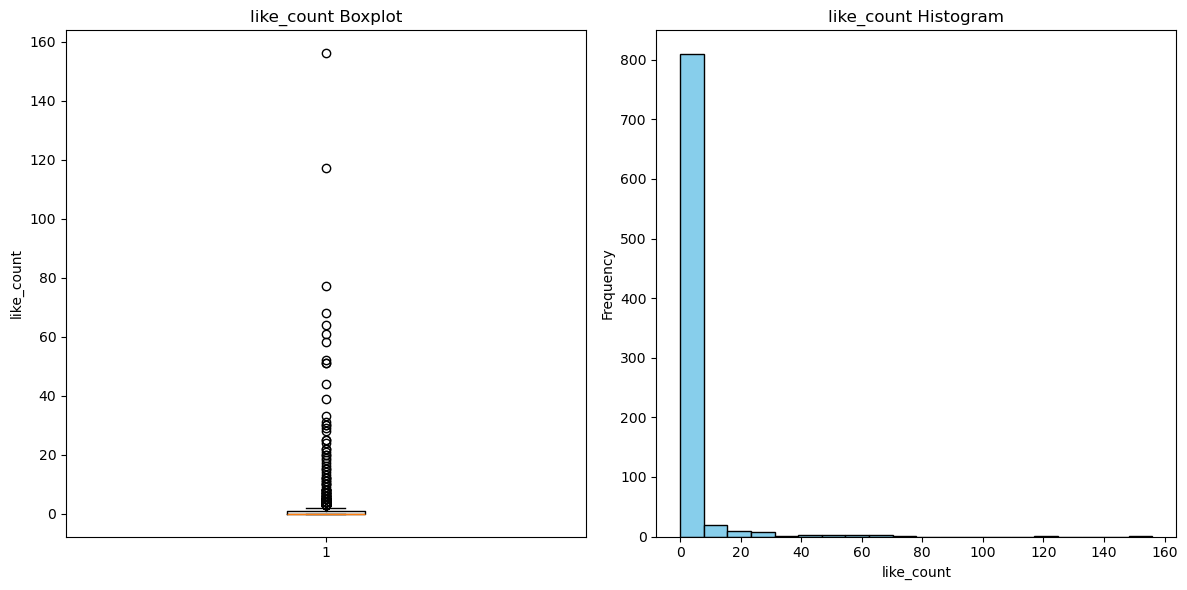

In [19]:
# like_count에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(noshop_df['like_count'])
axes[0].set_title('like_count Boxplot')
axes[0].set_ylabel('like_count')

axes[1].hist(noshop_df['like_count'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('like_count Histogram')
axes[1].set_xlabel('like_count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
noshop_df.describe()

,id,view_count,like_count,price,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
count,0.0,858.000000,858.000000,8.580000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,114.125874,2.224942,2.655282e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,447.926076,9.751856,7.447612e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,5.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,0.000000,6.825000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,0.000000,9.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,40.000000,1.000000,3.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,5914.000000,156.000000,1.519000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 판매자 위치 value_count
noshop_df['seller_location'].value_counts()

seller_location
용산구 용산2가동    17
영등포구 여의동      3
강동구 명일제1동     3
북구 두호동        3
중구 명동         3
             ..
서구 아라동        1
동구 용전동        1
마포구 공덕동       1
강남구 일원본동      1
광진구 광장동       1
Name: count, Length: 129, dtype: int64

In [22]:
noshop_df[noshop_df['like_count']>50]['title']

16                영종도 호텔 4성급 (패밀리트윈/더블) 일주일전 예약
77           평일숙박)드래곤시티 노보텔 앰배서더 용산 호텔 숙박권/조식포함
105               주말숙박)드래곤시티 노보텔 앰배서더 용산 호텔 숙박권
109        10/12,19 주말 가능)노보텔 용산 호텔 숙박권 서울드래곤시티
117    평일숙박특가)드래곤시티 노보텔 용산 호텔 스위트룸 숙박권/와인 1병 제공
154              (전국 최대 초특가) 제주 드림타워 하얏트호텔 숙박예약
168                 2024 롯데호텔 라세느 뷔페 식사권 - 판매완료
204               속초 썬라이즈 호텔 2인 1박 숙박권(2024년9월)
247                              신라호텔숙박권양도(성수기)
263                       제주도 2박3일 호텔 숙박이용권 50장
Name: title, dtype: object

In [23]:
noshop_df[noshop_df['view_count']>1000]['title']

16                영종도 호텔 4성급 (패밀리트윈/더블) 일주일전 예약
20                               십센치 호텔룸 4.0 양도
26                    (9/10월) 제주도 신화월드 호텔 & 리조트
74                 평일초특가)용산 노보텔(서울드래곤시티) 호텔 숙박권
76              토요일 가능)페어몬트 호텔 스위트룸 숙박권 골드라운지포함
77           평일숙박)드래곤시티 노보텔 앰배서더 용산 호텔 숙박권/조식포함
78              여의도 페어몬트 호텔 스팩트럼 2인 뷔페 식사권/숙박권X
85            페어몬트 호텔 마리포사 M29칵테일 이용권/콜키지&발렛이용권
86     드래곤시티 노보텔(머큐어) 용산 호텔 레스토랑&바 이용권 식사권 숙박권X
105               주말숙박)드래곤시티 노보텔 앰배서더 용산 호텔 숙박권
107          용산 푸드익스체인지 식사권(숙박권 별도)드래곤시티 노보텔 호텔
108         코트야드 영등포 타임스퀘어 호텔 숙박권/라운지&모모카페 조식포함
109        10/12,19 주말 가능)노보텔 용산 호텔 숙박권 서울드래곤시티
112     서울드래곤시티(노보텔 용산 호텔) 운카이,페이(FEI) 2인코스,숙박권
117    평일숙박특가)드래곤시티 노보텔 용산 호텔 스위트룸 숙박권/와인 1병 제공
136        [조식포함] 쉐라톤 포포인츠 호텔 서울 구로 9/28(토) 양도~
154              (전국 최대 초특가) 제주 드림타워 하얏트호텔 숙박예약
168                 2024 롯데호텔 라세느 뷔페 식사권 - 판매완료
179    드래곤시티 노보텔(머큐어) 용산 호텔 푸드익스체인지 식사권(숙박권 별도)
198                             서울 페어몬트 앰배서더 호텔
204               속초 썬라이즈 호텔 2인 1박 숙박권(2

In [62]:
load_dotenv()

openai.api_key = os.getenv('OPEN_AI_KEY')

In [66]:
df_hotel_sample = noshop_df.sample(n=5)
df_hotel_sample

,id,platform,original_link,post_time,title,view_count,like_count,price,images,description,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
276,NaN,번개장터,https://www.번개장터.com/items/,2024-09-13 18:49:54.760882,페어필드 메리어트 부산 호텔 급처,32,0,350000,https://media.bunjang.co.kr/product/289066389_...,9/14 - 9/17 3박\n2인권\n퀸베드 도시뷰\n온라인으로 양도,...,중구 을지로동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,중고나라,https://www.중고나라.com/items/,2024-10-01 16:26:53.007703,제주 켄싱턴리조트 35평 주말 숙박 12만. 10월 12-13 토일.,3,0,120000,https://img2.joongna.com/cafe-article-data/liv...,제주 켄싱턴리조트 한림. 켄싱턴 로얄스위트오션뷰 객실입니다. 35평 리모델링된 가장...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,NaN,번개장터,https://www.번개장터.com/items/,2024-09-21 18:49:54.760624,아고다호텔 40% 할인예약해드립니다,41,0,1000,https://media.bunjang.co.kr/product/290376846_...,아고다호텔 40% 할인예약해드립니다\n\n국내호텔 / 해외호텔 / 풀빌라 / ALL...,...,서초구 서초2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,NaN,중고나라,https://www.중고나라.com/items/,2024-10-01 18:26:53.007703,아쿠아필드 워터파크 이용권 2매,22,0,50000,https://img2.joongna.com/media/original/2024/0...,아쿠아필드(하남/고양/안성) 워터파크 6시간 이용권 2매\n\n등기 거래 합니다.\...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,NaN,중고나라,https://www.중고나라.com/items/,2024-10-02 09:45:53.004784,현대투어존 크루즈양도합니다,1,0,2000000,https://img2.joongna.com/cafe-article-data/liv...,"3인 148,500×20회납 297만원\n정리고민하느라 미납분있습니다\n미납분감안...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
def extract_fields(description):
    prompt = f"""
    우리는 여러 플랫폼에서 크롤링한 데이터를 통해 호텔과 숙박에 관한 노쇼 상품들을 판매할거야. 
    기본 필드에서 가져올 수 있는 정보들을 제외하고 우리가 필요한 필드가 9개가 있어. 
    만약 NaN이라면 그냥 모든 필드를 null로 표시해줘.
    이 9개의 필드는 
    1. 노쇼 상품의 사용 날짜 및 기한을 나타내는 expiration_date
       이때 날짜가 범위로 표현되어 있다면 범위를 나타내고, 날짜가 없다면 null로 표기해줘. 날짜 형식은 20xx-mm-dd로 통일해줘
    2. 객실 타입을 나타내는 room_type
       문자열 형태이며 관련된 내용이 없다면 null로 입력해줘.
    3. 사용 인원 수를 나타내는 head_count
       숫자 형식이며 성인이나 자녀에 대한 구분 없이 총 인원수만 입력해줘. 인원수에 대한 내용이 없다면 null로 기입해줘.
    4. 배송비인 shipping_fee 
       배송비가 적혀있지 않다면 0으로 표기해줘 (숫자 형식).
    5. 직거래인지 택배거래인지 알 수 있는 거래 유형인 transaction_method
       직거래라는 단어가 있으면 '직거래'로, 택배거래라는 단어가 있으면 '택배거래'로 표기해줘.
       두 단어가 모두 없으면 null로 표기해줘.
    6. 원래 노쇼 상품의 가격인 시중 가격인 market_price 
       시중 가격이 나와 있지 않다면 null로 표기해줘 (숫자 형식).
       만약 23.3만원 이런식으로 적혀져 있다면 market_price는 233000으로 입력되어야해.
    7. 조식 여부나 사우나 여부, 수영장 여부 등의 호텔에서 사용할 수 있는 서비스 이용 여부를 알 수 있는 옵션인 options
       서비스 관련 내용이 없다면 null로 표기해줘.
    8. 주차 여부를 나타내는 parking
       주차 여부가 있으면 TRUE로, 없으면 FALSE로 표기해줘. 주차 여부 정보가 없다면 null로 표기해줘.
    9. 호텔 체크인/체크 아웃 시간을 나타내는 check_in_out_time
       체크인 시간과 체크아웃 시간을 시간 형태로 작성해줘. 기본 형태는 체크인 시간 / 체크아웃 시간이야. 
       만약 체크인 시간이 없으면 null / 체크아웃 시간으로 기입해주고, 만약 체크아웃 시간이 없으면 체크인 시간 / null으로 기입해주고, 둘 다 없으면 아예 null로 작성해줘.

    설명에서 필요한 9개의 필드 정보만 추출해 json 형태로 작성해줘:
    JSON 형식으로 작성해줘. 예시: 

        "expiration_date": "2023-10-01",
        "room_type": "더블룸",
        "head_count": 2,
        ...
    
    설명: {description}

    필드:
    - expiration_date:
    - room_type:
    - head_count:
    - shipping_fee:
    - transaction_method:
    - market_price:
    - options:
    - parking:
    - check_in_out_time:
    """
    

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant."},
                  {"role": "user", "content": prompt}],
        max_tokens=1000
    )
    

    result = response['choices'][0]['message']['content'].strip()
    
    print("API 반환 결과:", result)


    if result.startswith("```json"):
        result = result.replace("```json", "").strip()
    if result.endswith("```"):
        result = result.replace("```", "").strip()

    try:
        return json.loads(result)
    except json.JSONDecodeError:
        print("유효하지 않은 JSON 형식입니다.")
        return None

extracted_fields = df_hotel_sample['description'].apply(extract_fields)

fields_df = pd.json_normalize(extracted_fields)

API 반환 결과: ```json
{
    "expiration_date": "2023-10-01",
    "room_type": "퀸베드 도시뷰",
    "head_count": 2,
    "shipping_fee": 0,
    "transaction_method": "온라인",
    "market_price": 0,
    "options": null,
    "parking": null,
    "check_in_out_time": null 
}
```
API 반환 결과: ```json
{
    "expiration_date": "2023-10-13",
    "room_type": "켄싱턴 로얄스위트오션뷰",
    "head_count": 2,
    "shipping_fee": 0,
    "transaction_method": "직거래",
    "market_price": 350000,
    "options": "조식 포함",
    "parking": null,
    "check_in_out_time": "null / null"
}
```
API 반환 결과: ```json
{
    "expiration_date": null,
    "room_type": null,
    "head_count": null,
    "shipping_fee": 0,
    "transaction_method": null,
    "market_price": null,
    "options": null,
    "parking": null,
    "check_in_out_time": null
}
```
API 반환 결과: ```json
{
    "expiration_date": "2025-06-30",
    "room_type": null,
    "head_count": null,
    "shipping_fee": 0,
    "transaction_method": null,
    "market_price": null,
    "op

In [68]:
fields_df

,expiration_date,room_type,head_count,shipping_fee,transaction_method,market_price,options,parking,check_in_out_time
0,2023-10-01,퀸베드 도시뷰,2.0,0,온라인,0.0,None,None,None
1,2023-10-13,켄싱턴 로얄스위트오션뷰,2.0,0,직거래,350000.0,조식 포함,None,null / null
2,None,None,NaN,0,None,NaN,None,None,None
3,2025-06-30,None,NaN,0,None,NaN,None,None,None
4,None,None,NaN,0,None,NaN,None,None,None


In [24]:
fields_df.isnull().sum()

expiration_date       2
room_type             2
head_count            1
shipping_fee          0
transaction_method    2
market_price          3
options               4
parking               5
check_in_out_time     2
dtype: int64

In [13]:
df = pd.read_excel('C:/Users/gmldu/바탕 화면/noshopping/noshow_analyze/data/오픈마켓 노쇼핑 샘플 데이터.xlsx')

In [14]:
df['price'].isnull().sum()

2

In [15]:
df[df['price'].isnull()]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.drop([0,101],axis=0,inplace=True)

In [17]:
df['price'].isnull().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 1 to 780
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   platform              779 non-null    object 
 1   original_link         779 non-null    object 
 2   post_time             779 non-null    object 
 3   title                 779 non-null    object 
 4   view_count            779 non-null    object 
 5   like_count            779 non-null    object 
 6   price                 779 non-null    object 
 7   images                774 non-null    object 
 8   description           779 non-null    object 
 9   category              279 non-null    object 
 10  status                279 non-null    object 
 11  seller_location       198 non-null    object 
 12  expiration_date       0 non-null      float64
 13  market_price          0 non-null      float64
 14  capacity              0 non-null      float64
 15  parking               0 non-

In [19]:
df['price'].unique()

array(['11,111원', '170,000원', '34,000원', '5,000원', '540,000원', '18,000원',
       '400,000원', '3,000원', '60,000원', '100,000원', '80,000원', '20,000원',
       '40,000원', '30,000원', '28,000원', '150,000원', '110,000원', '22,000원',
       '70,000원', '329,000원', '280,000원', '300,000원', '250,000원',
       '15,000원', '120,000원', '320,000원', '58,000원', '45,000원', '1원',
       '160,000원', '340,000원', '200,000원', '90,000원', '290,000원',
       '50,000원', '350,000원', '450,000원', '100만원', '4,000원', '550,000원',
       '65,000원', '38,000원', '999만 9,999원', '9,999만 9,999원', '56,000원',
       '500,000원', '7,000원', '9,000원', '270,000원', '68,000원', '17,000원',
       '890,000원', '520,000원', '35,000원', '180,000원', 300000, 500, 260000,
       410000, 1000000, 140000, 630000, 1000, 341960, 3000, 72530, 170000,
       450000, 210000, 120000, 190000, 230000, 160000, 80000, 1040000,
       30000, 999999, 380000, 350000, 1150000, 180000, 4000, 278000,
       480000, 420000, 50000, 999999999, 200000, 115000, 100000, 50

In [20]:
df['price'].isnull().sum()

0

In [22]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(',','').str.replace('만원','0000').str.replace('만','').str.replace('원','').str.replace(' ','').astype(int)

In [23]:
df[df['price'].isnull()]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method


In [24]:
df[df['title']=='LA호텔 바우처 판매']

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
62,당근마켓,https://www.daangn.com/articles/840874182,2024-10-02 08:54:31.444000,LA호텔 바우처 판매,13,0,1000000,NaN,안녕하세요\nLA호텔 바우처 판매합니다\n1. 사용 가능 기한 : 25년 6월 14...,티켓/교환권,...,송파구 잠실6동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df[df['price']==9999999]['title']

73     아이와 함께1박2일(2일~3일) 여행 못가시는 숙박(캠핑장.글램핑.호텔.키즈풀빌라등...
486    오늘 아이와 함께 1박2일(2일~3일) 여행 못가시는 숙박(캠핑장.글램핑.호텔.키즈...
Name: title, dtype: object

In [28]:
df['view_count'] = df['view_count'].astype(str)
df['like_count'] = df['like_count'].astype(str)

df['view_count'] = df['view_count'].str.replace('조회 ', '').astype(int)
df['like_count'] = df['like_count'].str.replace('시세조회', '').astype(int)

In [37]:
df[['view_count','like_count','price']].corr()

,view_count,like_count,price
view_count,1.000000,0.878513,-0.007680
like_count,0.878513,1.000000,-0.011479
price,-0.007680,-0.011479,1.000000


In [45]:
df[df['images'].isnull()]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
43,당근마켓,https://www.daangn.com/articles/840912334,2024-10-02 10:54:31.444000,"[삽니다] 급처 필요한 호텔 숙박권, 항공권, 공연 티켓, 식음료 상품권 등",25,0,1,NaN,유효기간 아주 임박한 상품\n싼 가격으로 급하게 처리 원하시는 분만\n물건(상품권 ...,티켓/교환권,...,서초구 반포3동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,당근마켓,https://www.daangn.com/articles/840893274,2024-10-02 09:54:31.444000,대전 라움호텔 2~3 1박 방2개판매,27,0,40000,NaN,대전 중리동 라움호텔 당일 숙박권 판매합니다\n방은 2개이고 침대2대씩있습니다 컴터...,티켓/교환권,...,대덕구 중리동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,당근마켓,https://www.daangn.com/articles/840874182,2024-10-02 08:54:31.444000,LA호텔 바우처 판매,13,0,1000000,NaN,안녕하세요\nLA호텔 바우처 판매합니다\n1. 사용 가능 기한 : 25년 6월 14...,티켓/교환권,...,송파구 잠실6동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,당근마켓,https://www.daangn.com/articles/840869181,2024-10-02 08:54:31.444000,인천 그랜드 하얏트 호텔,39,1,65000,NaN,10/3 목요일 조식 2인 \n관심있으신분 연락주세요\n보통 예약하면 성인 1인 5...,티켓/교환권,...,용인시 기흥구 보라동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,당근마켓,https://www.daangn.com/articles/840851248,2024-10-02 07:54:31.444000,"포항 영일대호텔(지곡) 숙박권(10/3(목)입실, 1박2일)",46,0,80000,NaN,개인적인이유로 숙박을 못하게되어 올립니다,티켓/교환권,...,포항시 북구 장량동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df[df['category']=='티켓/교환권'][['title','platform']]

,title,platform
1,호텔 양도,당근마켓
2,속초 체스터톤스 호텔,당근마켓
3,수성호텔 vip 티켓 1장,당근마켓
4,코엑스 주차권 (유효기간없음),당근마켓
5,"아난티 리조트호텔 가평, 코브, 빌라쥬드, 남해, 제주 숙박권 양도",당근마켓
...,...,...
94,씨마크호텔 숙박권과 10만원 이용권,당근마켓
95,서울신라호텔 디럭스룸+조식포함,당근마켓
97,여의도 불꽃축제 더현대 건물내 호텔주차권(8시간),당근마켓
98,광안리 캡슐호텔 양도합니다,당근마켓


In [52]:
df[df['category']=='여행/숙박/렌트'][['title','platform']]

,title,platform
102,"부산 광안리 켄트 호텔 프리미어1박 숙박권, 2인디너 포함",번개장터
103,10/4~6 제주 블루스프링 부띠끄호텔 오션뷰 양도,번개장터
104,강릉세인트존스호텔 숙박권(인피니티풀2인포함),번개장터
105,가격 내림/제주 해비치호텔 숙박권 및 해비치cc 4인그린피 이용 골프티켓,번개장터
106,LA호텔 바우처,번개장터
...,...,...
275,[급쳐]동탄 3s 호텔(동탄점) 1일 숙박권 팔아요,번개장터
276,[급양도] 르 메르디앙 명동 호텔 클럽룸 9/28(토) 1박 양도~,번개장터
278,조선호텔 숙박권 판매,번개장터
279,부국제부락페 해운대 엘리시아 부티크호텔 2박 정가이하양도,번개장터


In [ ]:
df['post_time']

In [53]:
df[df['category'].isnull()]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
281,중고나라,https://www.중고나라.com/items/,2024-10-02 10:18:53.001721,"경포 스카이베이호텔 숙박권(10/5,주말)",38,0,210000,https://img2.joongna.com/media/original/2024/0...,"executive twin 더블,싱글침대 2개\n소인포함 최대4인까지 가능합니다.\...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,중고나라,https://www.중고나라.com/items/,2024-10-02 10:18:53.002724,야놀자 여기어때 숙박 2만원 할인,9,0,1000,https://img2.joongna.com/media/original/2024/1...,국내숙박 2만원 할인해서 대신예약 드려요.​\n\n​❗지역 : 비수도권 전지역 가능...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,중고나라,https://www.중고나라.com/items/,2024-10-02 10:20:53.002724,(10월~11월)비발디파크/단양/변산/거제/천안/청송 외 전지점,2,0,5000,https://img2.joongna.com/cafe-article-data/liv...,"리조트&호텔 여행사 ""두번째 여행"" 입니다\n\n(대명)소노호텔&리조트/ 켄싱턴 리...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,중고나라,https://www.중고나라.com/items/,2024-10-02 10:03:53.002724,가평독채노래방풀빌라&키즈펜션,8,0,129000,https://img2.joongna.com/media/original/2024/1...,안녕 하세요. 남이섬 자라섬5분전\n 길목에 가평에 독채복층 \n풀빌라 쁘띠라온 펜...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,중고나라,https://www.중고나라.com/items/,2024-10-02 10:02:53.002724,비스타워커힐호텔 10월 2일 한강뷰 고층전망,27,0,290000,https://img2.joongna.com/media/original/2024/1...,비스타워커힐호텔 \n한강뷰 고층전망 디럭스더블룸 \n\n수영장 피트니스센터 \n4층...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,중고나라,https://www.중고나라.com/items/,2024-10-01 13:26:53.008778,<단풍시즌>10월~11월 델피노/단양/천안/청송/켄싱턴 설악밸리,0,0,5000,https://img2.joongna.com/cafe-article-data/liv...,"리조트&호텔 여행사 ""두번째 여행"" 입니다\n\n\n(대명)소노호텔&리조트/ 켄싱턴...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,중고나라,https://www.중고나라.com/items/,2024-10-01 13:26:53.008778,10월3 4 5쏠비치삼척&델피노 소노펠리체 오늘오후5시까지만 판매​,2,0,6565,https://img2.joongna.com/cafe-article-data/liv...,"☎050~6766~0789☎\n코로나or집합금지 어떠한 이유로도 취소, 환불 불가합...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,중고나라,https://www.중고나라.com/items/,2024-10-01 13:26:53.008778,​​@홍천비발디파크 특가10월3 4 5 오늘 오후5시까지만판매!!,0,0,6767,https://img2.joongna.com/cafe-article-data/liv...,"☎050~6766~0789☎\n전화 or 문자 모두 가능, 채팅보다는 전화문자가 빠...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,중고나라,https://www.중고나라.com/items/,2024-10-01 13:26:53.008778,설악워터피아~천안/거제오션어드벤처2만7천 최저가~오션월드,1,0,5676,https://img2.joongna.com/cafe-article-data/liv...,"☎050~6766~0789☎\n전화 문자 가능~ 어떠한 이유로도 취소, 환불 불가\...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['category'].value_counts()

category
여행/숙박/렌트       127
티켓/교환권          68
외식              21
생활/주방           13
가구/인테리어          9
콘서트              6
만화               6
여행/취미/레저/건강      4
취미/게임/음반         3
학습도구/문구/필기류      3
예술/디자인           2
경제/경영            2
기타(상품권)          2
테마파크             2
스포츠/레저           2
기타(티켓)           1
뷰티/미용            1
시/소설             1
학습/사전/참고서        1
여성의류             1
도서               1
가공식품             1
기타 중고물품          1
공연/전시/행사         1
Name: count, dtype: int64

In [41]:
df[['post_time','title']].head(20)

,post_time,title
1,2024-10-02 12:54:31.443000,호텔 양도
2,2024-10-02 12:53:31.443000,속초 체스터톤스 호텔
3,2024-10-02 12:52:31.443000,수성호텔 vip 티켓 1장
4,2024-10-02 12:52:31.443000,코엑스 주차권 (유효기간없음)
5,2024-10-02 12:52:31.443000,"아난티 리조트호텔 가평, 코브, 빌라쥬드, 남해, 제주 숙박권 양도"
6,2024-10-02 12:51:31.443000,요가복
7,2024-10-02 12:35:31.443000,파타야 힐튼호텔 디럭스룸 10/12~13
8,2024-10-02 12:34:31.443000,멕시코 칸쿤 TRS호텔 모자 (새상품)
9,2024-10-02 12:33:31.443000,글램 호텔 숙박
10,2024-10-02 12:33:31.443000,호텔수성 인피니티 수영장 티켓 3장 사봐요!
